# Machine Learning Code

In [2]:
# In order to start we need to Load in some Packages

In [1]:
from packaging import version
import sklearn
import matplotlib.pyplot as plt

from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer  # Import the imputer

In [2]:
# Now, we can load the data set so that we can explore all the features.

In [65]:
# We want to split the data set before we begin. A random sampling will suffice. 

total_set = pd.read_csv("train.csv", nrows = 89000)

In [66]:
total_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89000 entries, 0 to 88999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                89000 non-null  object 
 1   fare_amount        89000 non-null  float64
 2   pickup_datetime    89000 non-null  object 
 3   pickup_longitude   89000 non-null  float64
 4   pickup_latitude    89000 non-null  float64
 5   dropoff_longitude  89000 non-null  float64
 6   dropoff_latitude   89000 non-null  float64
 7   passenger_count    89000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 5.4+ MB


In [67]:
# Now we spliting the training and test data set

from sklearn.model_selection import train_test_split

taxi_train, taxi_test = train_test_split(total_set, test_size = .2, random_state = 42)


In [68]:
# Now we have to explore the data set

In [69]:
taxi_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
53563,2014-06-06 10:09:00.000000190,24.00,2014-06-06 10:09:00 UTC,-73.987137,40.759077,-74.017247,40.705102,4
3886,2015-02-01 17:56:07.00000010,11.00,2015-02-01 17:56:07 UTC,-74.012802,40.702644,-73.979904,40.717682,1
81350,2009-10-30 07:36:48.0000003,5.70,2009-10-30 07:36:48 UTC,-73.976334,40.776474,-73.980876,40.762365,1
27681,2014-05-10 13:44:00.00000095,57.33,2014-05-10 13:44:00 UTC,-73.783462,40.648685,-73.984497,40.783407,1
23590,2012-07-03 07:54:37.0000002,10.10,2012-07-03 07:54:37 UTC,-74.003328,40.743794,-73.970523,40.762042,1


In [70]:
# A better way to get an idea of what is happening in the data set

taxi_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71200 entries, 53563 to 15795
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                71200 non-null  object 
 1   fare_amount        71200 non-null  float64
 2   pickup_datetime    71200 non-null  object 
 3   pickup_longitude   71200 non-null  float64
 4   pickup_latitude    71200 non-null  float64
 5   dropoff_longitude  71200 non-null  float64
 6   dropoff_latitude   71200 non-null  float64
 7   passenger_count    71200 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 4.9+ MB


Text(0.5, 1.0, 'Instances per Fare Amount, in Dollars')

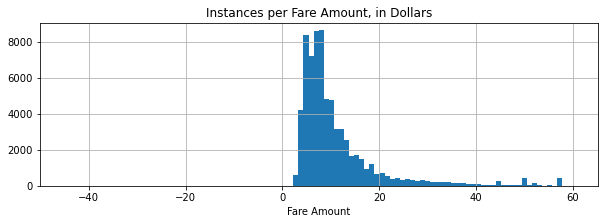

In [71]:
# From the above command we see that we have two object type attributes,
# one integer attribute, and five float type attributes.

# We can have a better understanding of the scales of the different attributes
# By visualizing them

taxi_train[taxi_train.fare_amount <60].fare_amount.hist(bins = 100,
                                                         figsize = (10,3))

plt.xlabel("Fare Amount")
plt.title("Instances per Fare Amount, in Dollars")

In [72]:
# From afar it seems like most of the fare amounts are between 
# 0 and 20 Dollars, this is something that we can take into consideration when scaling 

Text(0.5, 1.0, 'Instances per Passenger Number')

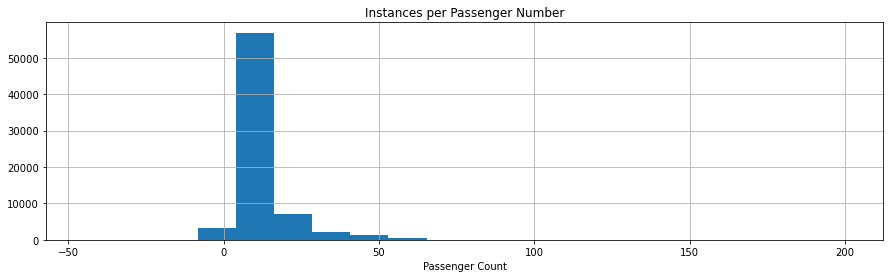

In [73]:
# Lets also take a look at the passenger count

taxi_train[taxi_train.passenger_count <20].fare_amount.hist(bins = 20,
                                                         figsize = (15,4))

plt.xlabel("Passenger Count")
plt.title("Instances per Passenger Number")

In [74]:
# Impute missing values with the mean for Taxi Fare column

taxidf = taxi_train

imputer = SimpleImputer(strategy="mean")

taxi_num = taxidf.select_dtypes(include = [np.number])

imputer.fit(taxi_num)

imputer.transform(taxi_num)

array([[ 24.        , -73.987137  ,  40.759077  , -74.017247  ,
         40.705102  ,   4.        ],
       [ 11.        , -74.01280212,  40.70264435, -73.97990417,
         40.71768188,   1.        ],
       [  5.7       , -73.976334  ,  40.776474  , -73.980876  ,
         40.762365  ,   1.        ],
       ...,
       [ 10.5       , -73.968138  ,  40.759652  , -73.985187  ,
         40.727665  ,   1.        ],
       [ 12.1       , -73.987243  ,  40.72241   , -73.97162   ,
         40.76199   ,   1.        ],
       [ 57.33      , -73.778682  ,  40.646662  , -73.99368   ,
         40.752352  ,   1.        ]])

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

taxi_num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = "median")),
    ("standardizer", StandardScaler())
])

# We can apply the same transformation as above using
# a pipeline to make things more efficient

# Note: Have to keep things even between training and test and training

taxitestdf = taxi_test

taxi_num_test = taxitestdf.select_dtypes(include = [np.number])

imputer.fit(taxi_num_test)

imputer.transform(taxi_num_test)

taxi_num_test

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
12033,13.0,-73.992857,40.755167,-73.997920,40.719575,2
80075,10.5,-73.997280,40.756392,-73.979448,40.776617,2
67676,18.5,-73.986916,40.756378,-73.960571,40.814308,2
23346,7.3,-73.974164,40.743048,-73.951747,40.773582,1
63121,6.1,-73.990287,40.756630,-73.976654,40.755276,1
...,...,...,...,...,...,...
87049,5.7,-73.962758,40.775777,-73.962772,40.769102,1
9311,8.0,-73.983733,40.731897,-73.992332,40.749242,1
43901,11.0,-73.997681,40.756706,-73.966759,40.795944,2
82129,9.0,-73.963333,40.774702,-73.969837,40.762297,1


In [76]:
# Display the first few rows of the DataFrame after imputation
print("Imputed Taxi Train Data:")
print(taxi_num.head())

Imputed Taxi Train Data:
       fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
53563        24.00        -73.987137        40.759077         -74.017247   
3886         11.00        -74.012802        40.702644         -73.979904   
81350         5.70        -73.976334        40.776474         -73.980876   
27681        57.33        -73.783462        40.648685         -73.984497   
23590        10.10        -74.003328        40.743794         -73.970523   

       dropoff_latitude  passenger_count  
53563         40.705102                4  
3886          40.717682                1  
81350         40.762365                1  
27681         40.783407                1  
23590         40.762042                1  


In [77]:
# To get a better look

taxi_num

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
53563,24.00,-73.987137,40.759077,-74.017247,40.705102,4
3886,11.00,-74.012802,40.702644,-73.979904,40.717682,1
81350,5.70,-73.976334,40.776474,-73.980876,40.762365,1
27681,57.33,-73.783462,40.648685,-73.984497,40.783407,1
23590,10.10,-74.003328,40.743794,-73.970523,40.762042,1
...,...,...,...,...,...,...
6265,16.10,-73.971785,40.756499,-74.013319,40.709354,4
54886,24.67,-73.864515,40.770517,-73.978920,40.746717,1
76820,10.50,-73.968138,40.759652,-73.985187,40.727665,1
860,12.10,-73.987243,40.722410,-73.971620,40.761990,1


In [78]:
# Display the info of the imputed DataFrame
print("Imputed Taxi Train Info:")
print(taxi_num.info())

Imputed Taxi Train Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 71200 entries, 53563 to 15795
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        71200 non-null  float64
 1   pickup_longitude   71200 non-null  float64
 2   pickup_latitude    71200 non-null  float64
 3   dropoff_longitude  71200 non-null  float64
 4   dropoff_latitude   71200 non-null  float64
 5   passenger_count    71200 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 3.8 MB
None


In [79]:
# Now that we know that there are no null numbers we can move on to organizing the other columns

In [80]:
# We need to be able to know the distance traveled but we are only given
# longitude and latitude lines. 

# Since we need to calculate distance on a sphere we can use the Haversine Formula

In [81]:
# Apply to DF
import math

def hav_dist(lat1, lon1, lat2, lon2):
    dLat = np.radians(lat2 - lat1)
    dLon = np.radians(lon2 - lon1)
    lat1 = np.radians(lat1)
    lat2 = np.radians(lat2)
    
    a = (np.sin(dLat / 2) ** 2 + np.sin(dLon / 2) ** 2 * np.cos(lat1) * np.cos(lat2))
    rad = 6371  # Earth's radius in kilometers
    c = 2 * np.arcsin(np.sqrt(a))
    
    distance = rad * c
    return distance



distance = hav_dist(taxi_num['pickup_latitude'], 
                                 taxi_num['pickup_longitude'], 
                                 taxi_num['dropoff_latitude'], 
                                 taxi_num['dropoff_longitude'])

distance

53563     6.515956
3886      3.238034
81350     1.614803
27681    22.616091
23590     3.428255
           ...    
6265      6.303082
54886     9.992735
76820     3.835848
860       4.593692
15795    21.601278
Length: 71200, dtype: float64

In [82]:
# Now we should used the function that we created before to create a
# Column that describes the total distance traveled

taxi_train2 = pd.concat([taxi_num, distance], axis = 1)

taxi_train2.rename(columns = {0:"distance"}, inplace = True)

taxi_train2

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
53563,24.00,-73.987137,40.759077,-74.017247,40.705102,4,6.515956
3886,11.00,-74.012802,40.702644,-73.979904,40.717682,1,3.238034
81350,5.70,-73.976334,40.776474,-73.980876,40.762365,1,1.614803
27681,57.33,-73.783462,40.648685,-73.984497,40.783407,1,22.616091
23590,10.10,-74.003328,40.743794,-73.970523,40.762042,1,3.428255
...,...,...,...,...,...,...,...
6265,16.10,-73.971785,40.756499,-74.013319,40.709354,4,6.303082
54886,24.67,-73.864515,40.770517,-73.978920,40.746717,1,9.992735
76820,10.50,-73.968138,40.759652,-73.985187,40.727665,1,3.835848
860,12.10,-73.987243,40.722410,-73.971620,40.761990,1,4.593692


In [83]:
# We also would like to know more information about the time that these trips take place
# Currently, they are in a format that is not all that useful to us

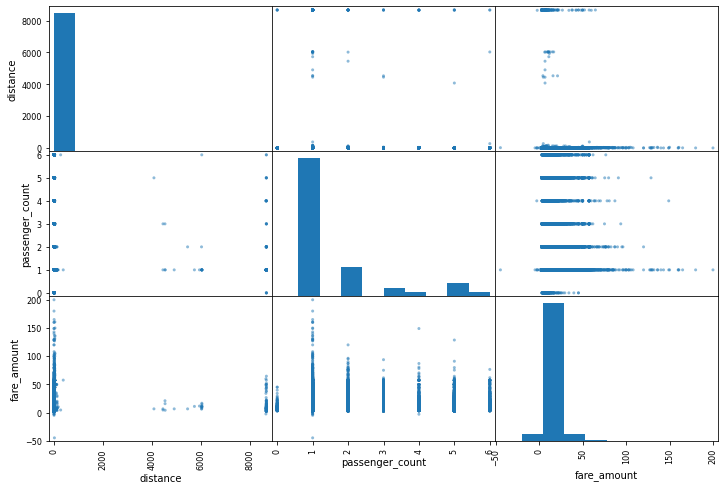

In [84]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

attributes = ["distance", "passenger_count",
              "fare_amount"]
scatter_matrix(taxi_train2[attributes], figsize=(12, 8))
plt.show()

In [85]:
# Based on the look of the scatter matrix it seems like there is some scaling that needs to be done

In [86]:
# Let's also take a look at a correlation matrix

taxi_corr = taxi_train2.corr()

taxi_corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
fare_amount,1.000000,0.007149,-0.007285,0.004910,-0.005141,0.015556,0.019314
pickup_longitude,0.007149,1.000000,-0.960370,0.957954,-0.948459,-0.004193,0.145059
pickup_latitude,-0.007285,-0.960370,1.000000,-0.923297,0.941141,0.002164,-0.128324
dropoff_longitude,0.004910,0.957954,-0.923297,1.000000,-0.981988,-0.002825,0.134390
dropoff_latitude,-0.005141,-0.948459,0.941141,-0.981988,1.000000,0.001595,-0.114983
passenger_count,0.015556,-0.004193,0.002164,-0.002825,0.001595,1.000000,-0.002253
distance,0.019314,0.145059,-0.128324,0.134390,-0.114983,-0.002253,1.000000


In [87]:
# Stronger Correlations between the distance and fare amount

In [88]:
# Applying the same transformations to the test set

distance_test = hav_dist(taxi_num_test['pickup_latitude'], 
                                 taxi_num_test['pickup_longitude'], 
                                 taxi_num_test['dropoff_latitude'], 
                                 taxi_num_test['dropoff_longitude'])

#distance_test

taxi_test_final = pd.concat([taxi_test, distance_test], axis = 1)

taxi_test_final.rename(columns = {0:"distance"}, inplace = True)

### Working on the Regressors

In [89]:
# Linear Regressor

lr = LinearRegression()

X_train= taxi_train2[["distance"]].values
y_train= taxi_train2[["fare_amount"]].values
X_test= taxi_test2[["distance"]].values
y_test= taxi_test2[["fare_amount"]].values

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error

print("Test RMSE: %.3f" % mean_squared_error( y_test, y_pred) ** 0.5)

Test RMSE: 9.567


In [90]:
# RandomForest Regression

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=200)
rf.fit(X_train, y_train.ravel())
y_pred = rf.predict(X_test)

print("Test RMSE: %.3f" % mean_squared_error( y_test, y_pred) ** 0.5)

Test RMSE: 4.957


## Our Model, of course, can be improved. Here are some of the features that we could not properly impletement but began working on with hopes of improving our model.

In [34]:
# Results appear to be skewed due to the differences in scaling between features

# Dealing with Datetime

taxi_train['pickup_datetime'] = taxi_train2.to_datetime(taxi_train.pickup_datetime)
taxi_test['pickup_datetime'] = taxi_train2.to_datetime(taxi_test.pickup_datetime)


## We want to be able to work with daytime feature in a way that is useful

AttributeError: 'DataFrame' object has no attribute 'to_datetime'

In [10]:
# Failed Version of Haversine Function

import math

def haversine(lat1, lon1, lat2, lon2):

    # Coordinates in decimal degrees (e.g. 2.89078, 12.79797)
    #lon1, lat1 = coord1
    #lon2, lat2 = coord2

    R = 6371000  # radius of Earth in meters
    phi_1 = math.radians(lat1)
    phi_2 = math.radians(lat2)

    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = math.sin(delta_phi / 2.0) ** 2 + math.cos(phi_1) * math.cos(phi_2) * math.sin(delta_lambda / 2.0) ** 2
    
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    meters = R * c  # output distance in meters
    km = meters / 1000.0  # output distance in kilometers

    meters = round(meters, 3)
    km = round(km, 3)

    return km

AttributeError: 'Series' object has no attribute 'taxi_train'